# Optimizers

**Gradient Descent -> Gradient Descent with Momentum -> AdaGrad -> RMSProp -> Adam -> AdamW**

### What is it?

Optimizer is a math function that updates the parameters of the model to minimize the loss function.

Lets start with writing a simple neural net with two linear layers.

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x


_generata_data_ 
1. create linear dataset
2. X - input data from -1 to 1
3. y - 3x + noise - the linear relationship the model should learn

_train_model_
Imitate the training process of the model.
1. Define the model
2. Define the loss function
3. Define the optimizer
4. Update the parameters of the model
5. Calculate the loss
6. Backpropagate the loss
7. Update the parameters of the model

In [77]:
def generate_data(n_samples=100):
    X = np.linspace(-1, 1, n_samples)
    y = 3 * X + np.random.normal(0, 0.1, n_samples)
    return X, y

def train_model(model, optimizer_name, X, y, lr=0.01, epochs=200):
    trained_model = model
    criterion = nn.MSELoss()
    
    # Handle different optimizers
    if optimizer_name == "SGD_Momentum":
        optimizer = optim.SGD(trained_model.parameters(), lr=lr, momentum=0.9)
    else:
        optimizer = getattr(optim, optimizer_name)(trained_model.parameters(), lr=lr)


    losses = []
    for _ in range(epochs):
        trained_model.train()
        inputs = torch.from_numpy(X).float().unsqueeze(1)
        targets = torch.from_numpy(y).float().unsqueeze(1)

        optimizer.zero_grad()
        outputs = trained_model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        losses.append(loss.item())
    return losses

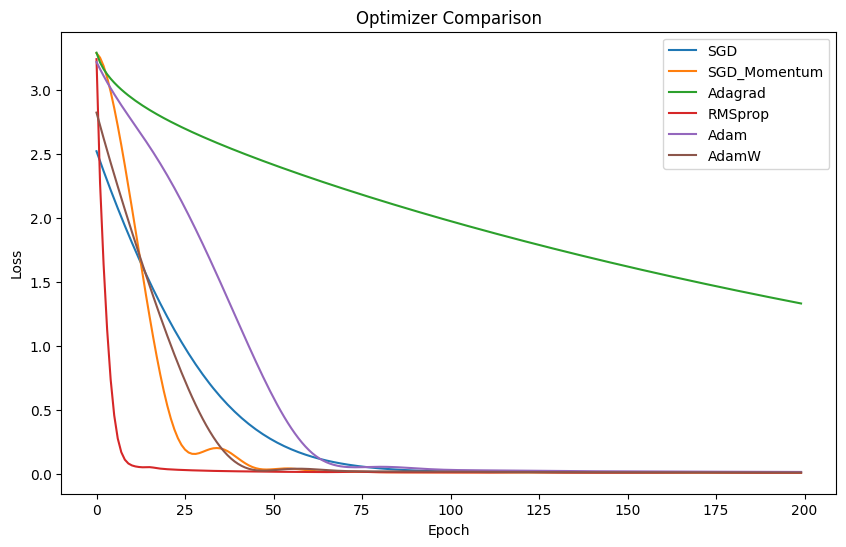

In [103]:
def compare_optimizers(model, data, lr):
    X, y = data
    optimizers = ['SGD', 'SGD_Momentum', 'Adagrad', 'RMSprop', 'Adam', 'AdamW']
   
    plt.figure(figsize=(10, 6))
    for opt in optimizers:
        trained_model = SimpleNet() if model == 'simple' else ComplexNet()
        losses = train_model(trained_model, opt, X, y, lr)
        plt.plot(losses, label=opt)

    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Optimizer Comparison')
    plt.legend()
    plt.show()

data = generate_data()
compare_optimizers(model='simple', data=data, lr=0.01)

Lets create a more complex neural network and train it on non linear data.

In [68]:
class ComplexNet(nn.Module):
    def __init__(self):
        super(ComplexNet, self).__init__()
        self.fc1 = nn.Linear(1, 20)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(20, 20)
        self.fc3 = nn.Linear(20, 1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

generating non linear data

In [69]:
def generate_sine_data(n_samples=100):
    X = np.linspace(-2 * np.pi, 2 * np.pi, n_samples)
    y = np.sin(X) + np.random.normal(0, 0.1, n_samples)
    return X, y

Lets try 3 scenarios:
1. learning rate = 0.001
    - Smaller learning rate leads to more stable training, no loss spikes, but takes more time to converge
2. learning rate = 0.01
    - Learning rate = 0.01 leads to faster convergence, but loss spikes are more frequent
3. learning rate = 0.1
    - Larger learning rate leads to faster convergence, but training is very unstable




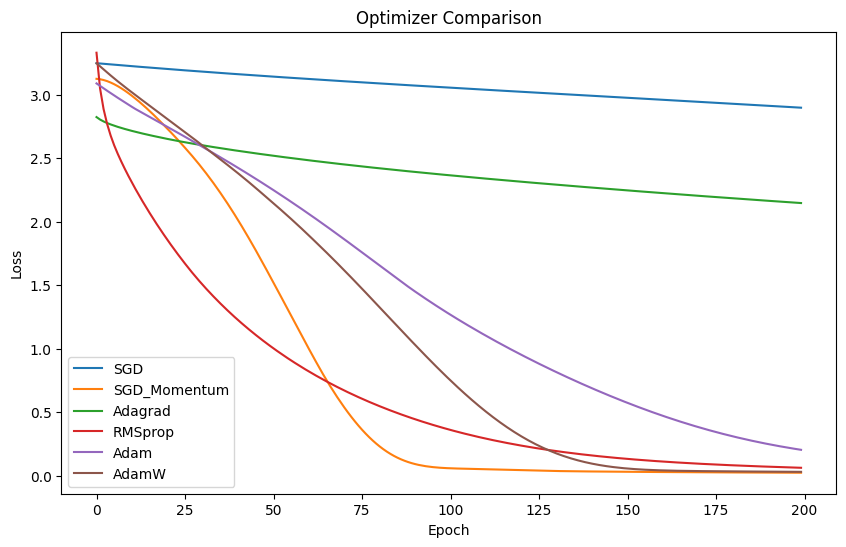

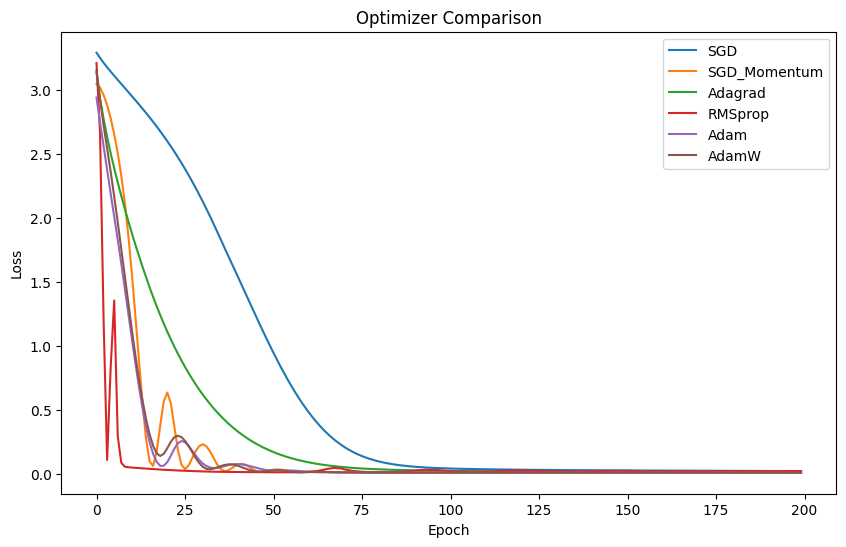

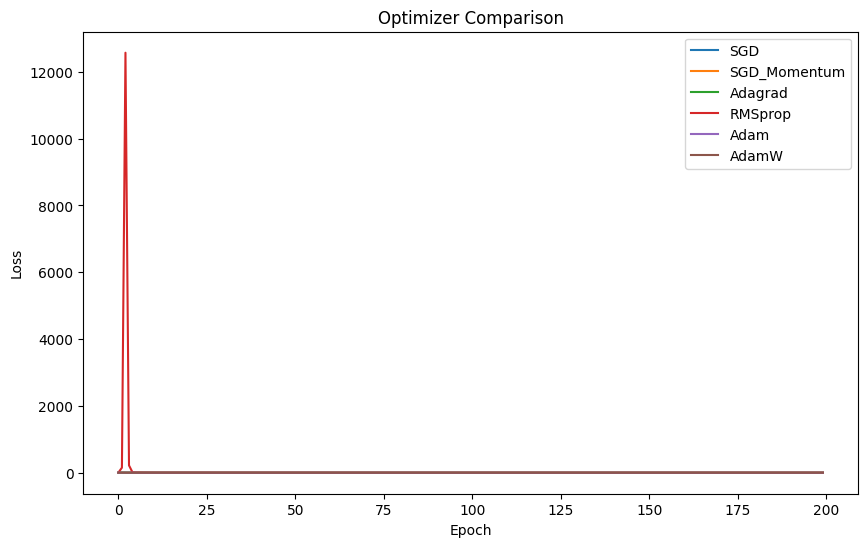

In [104]:
sine_data = generate_sine_data()
compare_optimizers(model='complex', data=data, lr=0.001)
compare_optimizers(model='complex', data=data, lr=0.01)
compare_optimizers(model='complex', data=data, lr=0.1)

### Intuition behind the formulas

#### **SGD optimizer**

Idea: Move parameters in the opposite direction of the gradient

Why opposite?
- Gradient itself shows the direction of maximization (direction of steepest increase)
- We want to minimize the loss, so we move in the opposite direction (direction of steepest decrease)



$$\theta_{t+1} = \theta_t - \eta g(\theta_t)$$

where:
- $\theta_t$ is the parameter at time step t
- $\eta$ is the learning rate
- $g(\theta_t)$ is the gradient of the loss function with respect to the parameter at iteration t

#### **SGD with Momentum**



Idea: Momentum was inspired by physics - imagine how a ball is rolling down a hill. It gains momentum and rolls faster and faster (inertia).

Momentum means particle rememebers its past movements

$$\theta_{t+1} = \theta_t - \eta v_{t+1}$$

$$v_{t+1} = \gamma v_t +  g(\theta_t)$$

where:
- $\theta_t$ is the parameter at time step t
- $\eta$ is the learning rate
- $\gamma$ is the momentum
- $g(\theta_t)$ is the gradient of the loss function with respect to the parameter at iteration t

momentum is a hyperparameter
- use **0.5- 0.8** for simplier optimization problems
- use **0.95 - 0.99** for noisy and sparse gradients
- use **0.9** as a default

momentum and learning rate relationship
- if learning rate is high, momentum should be low
- if learning rate is low, momentum can be high









#### **Adagrad optimizer**

**Idea**: Adjusting learning rate for each parameter by dividing by the sum of squared gradients. Frequently apdated parameters get smaller learning rates

Why squared?

1. Better differentiability
2. Emphasizes large gradients. Helps to focus on informative updates rather than overtraining on common cases

**step one**: calculate the sum of squared gradients

$$G_t = G_{t-1} + g(\theta_i)^2$$

where:
- $G_t$ is the sum of squared gradients at time step t
- $G_{t-1}$ is the sum of squared gradients at time step t-1
- $g(\theta_i)^2$ is squared gradient of the loss function with respect to the parameter at iteration i



**step two**: update the parameters

$$\theta_{t+1} = \theta_t -  \frac{\eta }{\sqrt{G_t + \epsilon} }g(\theta_t)$$

where:
- $\theta_{t+1}$ is the parameter at time step t+1
- $\theta_t$ is the parameter at time step t
- $\eta$ is the learning rate
- $g(\theta_t)$ is the gradient of the loss function with respect to the parameter at iteration t
- $\epsilon$ is a small constant to avoid division by zero

Downsides:
- Denominator grows over time, so learning rate decays over time leading to slower convergence

#### **RMSProp optimizer**

**Idea**: Modifies Adagrad approach by using moving average of squared gradients instead of sum. **E[g^2] has a limit unlike Adagrad sum.**

**step one**: calculate the moving average of squared gradients

$$E[g^2]_t = \beta E[g^2]_{t-1} + (1 - \beta) g(\theta_t)^2$$

where:
- $E[g^2]_t$ is the moving average of squared gradients at time step t
- $\beta$ is the decay rate (how much previous gradients matter)
- $g(\theta_t)^2$ is squared gradient of the loss function with respect to the parameter at iteration t

**The older the gradient, the less it contributes to the mean.**

$$E[g^2]_t = \beta E[g^2]_{t-1} + (1 - \beta) g_t)^2 = \beta (\beta E[g^2]_{t-2} + (1 - \beta) g^2_{t-1}) + (1 - \beta) g^2_t) = 
\beta^2 E[g^2]_{t-2} + \beta (1 - \beta) g^2_{t-1} + (1 - \beta) g^2_t$$

continuing substitution:

$$ \beta^3 E[g^2]_{t-3} + \beta^2 (1 - \beta) g^2_{t-2} + \beta (1 - \beta) g^2_{t-1} + (1 - \beta) g^2_t$$

=> $$\beta^n -> 0$$

The formula is designed so that the weights sum to 1 ($\beta + (1 - \beta) = 1$)

The new moving average whould be between min and max of the previous moving average and the new squared gradient.
for example:
 1. previous moving average = 10
 2. current squared gradient = 20
 3. new moving average: 10 * 0.9 + 20 * 0.1 = 11

default value for $\beta$ is 0.9

**step two**: update the parameters

$$\theta_{t+1} = \theta_t -  \frac{\eta }{\sqrt{E[g^2]_t + \epsilon} } g(\theta_t)$$



#### **Adam optimizer**

**Idea**: Adam combines the ideas of momentum and RMSProp. (acceleration + addaptive learning rate)



**Step one**: calculate the moving average of squared gradients (RMSProp component)
- "How confident am I?"

$$v_t = \beta_1 v_{t-1} + (1 - \beta_1) g(\theta_t)^2$$ 

where:
- $\beta_1$ is the decay rate for the RMSProp component (default value is 0.99)

**Step two**: calculate the moving average of gradients (momentum component)
- "Where should I go?"  
$$m_t = \beta_2 m_{t-1} + (1 - \beta_2) g(\theta_t)$$ 

where:
- $\beta_2$ is the decay rate for the momentum component (default value is 0.9)

**Step three**: bias correction:

For more accurate initial steps. 

Why do we need it? 

On early stages 
$m_t$ and $v_t$ might be lower than expected.
$(1 - \beta_1^t)$ and $(1 - \beta_2^t)$ are close to 0 which corrects the early $m_t$ and $v_t$


$$m_t = \frac{m_t}{1 - \beta_1^t}$$

$$v_t = \frac{v_t}{1 - \beta_2^t}$$

**Step four**: update the parameters

$$\theta_{t+1} = \theta_t -  \frac{\eta }{\sqrt{v_t + \epsilon} } m_t$$




### Implementation of AdamW
**The problem of Adam**: weight decay($\lambda$) is applied to the gradients before the adaptive scaling occurs:
=> params with larger gradient history get less regularization

$$\theta_{t+1} = \theta_t -  \frac{\eta }{\sqrt{v_t + \epsilon} }(m_t + \lambda \theta_t)$$

AdamW resolves that problem by applying weight decay after the adaptive scaling:

$$\theta_{t+1} = \theta_t -  \eta (\frac{m_t} {\sqrt{v_t + \epsilon} }+ \lambda \theta_t)$$






In [18]:
import torch

class AdamW():
    def __init__(self, params, lr = 0.001, beta_1 = 0.9, beta_2 = 0.99, eps = 1e-8, weight_decay=0.01):
        self.params = list(params)
        self.lr = lr
        self.beta_1 = beta_1
        self.beta_2 = beta_2
        self.eps = eps
        self.weight_decay = weight_decay

        self.m = [torch.zeros_like(p) for p in self.params]
        self.v = [torch.zeros_like(p) for p in self.params]
        self.st = 0

    def zero_grad(self):
        for param in self.params:
            # because pytorch is setting params grad to None after step method to free memory
            if param.grad is not None:
                # detaches param from a computational pytorch graph
                param.grad.detach()
                # fill gradient tensor with 0
                param.grad.zero_()

    def step(self):
        self.st += 1

        for i, param in enumerate(self.params):
            print(param.grad)
            if param.grad is None:
                continue

            m_upd = self.beta_1 * self.m[i] + (1 - self.beta_1) * param.grad
            v_upd = self.beta_2 * self.v[i] + (1 - self.beta_2) * torch.pow(param.grad, 2)

            m_i_correction = m_upd/(1 - self.beta_1 ** self.st)
            v_i_corrected = v_upd/(1 - self.beta_2 ** self.st)

            param.data = param.data - self.lr * (m_i_correction / (torch.sqrt(v_i_corrected) + self.eps) + self.weight_decay * param.data) 

            self.m[i] = m_upd
            self.v[i] = v_upd

In [20]:
# Create a parameter with requires_grad=True
param = torch.nn.Parameter(torch.tensor([1.0, 2.0, 3.0]), requires_grad=True)

# Create a simple loss function that definitely uses the parameter
def simple_loss(param):
    return torch.sum(param**2)  # Quadratic loss

# Initialize the optimizer
optimizer = AdamW([param], lr=0.01)

# Print initial state
print(f"Initial parameter: {param.data}")

for step in range(5):
    # Zero gradients first (PyTorch standard practice)
    optimizer.zero_grad()
    
    # Compute loss and gradients
    loss = simple_loss(param)
    loss.backward()
    
    # Verify gradient exists
    print(f"\nStep {step+1}:")
    print(f"  Loss: {loss.item():.4f}")
    print(f"  Gradient: {param.grad}")
    
    if param.grad is None:
        print("  WARNING: Gradient is None!")
        continue
    
    # Update parameters
    optimizer.step()
    
    # Print updated values
    print(f"  Updated parameter: {param.data}")


Initial parameter: tensor([1., 2., 3.])

Step 1:
  Loss: 14.0000
  Gradient: tensor([2., 4., 6.])
tensor([2., 4., 6.])
  Updated parameter: tensor([0.9899, 1.9898, 2.9897])

Step 2:
  Loss: 13.8775
  Gradient: tensor([1.9798, 3.9796, 5.9794])
tensor([1.9798, 3.9796, 5.9794])
  Updated parameter: tensor([0.9798, 1.9796, 2.9794])

Step 3:
  Loss: 13.7557
  Gradient: tensor([1.9596, 3.9592, 5.9588])
tensor([1.9596, 3.9592, 5.9588])
  Updated parameter: tensor([0.9697, 1.9694, 2.9691])

Step 4:
  Loss: 13.6345
  Gradient: tensor([1.9394, 3.9388, 5.9382])
tensor([1.9394, 3.9388, 5.9382])
  Updated parameter: tensor([0.9596, 1.9592, 2.9588])

Step 5:
  Loss: 13.5140
  Gradient: tensor([1.9193, 3.9184, 5.9176])
tensor([1.9193, 3.9184, 5.9176])
  Updated parameter: tensor([0.9496, 1.9490, 2.9485])
